# Machine Learning Model Comparison Using the Iris Dataset

This notebook provides an educational walkthrough of comparing different machine learning classification models using the famous Iris flower dataset. We'll explore the dataset, understand the features, visualize the data, and evaluate several classification algorithms to determine which performs best for this task.

## 1. Introduction to the Iris Dataset

The Iris dataset is one of the most famous datasets in the field of machine learning and statistics. Collected by botanist Ronald Fisher in 1936, it contains measurements of 150 iris flowers from three different species:

- Iris Setosa
- Iris Versicolor
- Iris Virginica

For each flower, four features were measured:

- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

This dataset is popular because it's simple, well-understood, and serves as an excellent example for classification problems. It's often used to demonstrate the application of various machine learning algorithms.

## 2. Loading and Exploring the Dataset

Let's start by importing the necessary libraries and loading the Iris dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Set plotting style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

np.random.seed(42)

In [2]:
df = pd.read_csv('IRIS.csv')

print("Dataset shape: ", df.shape)
df.head()

Dataset shape:  (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's examine some basic statistics of our dataset.

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Class distribution: species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


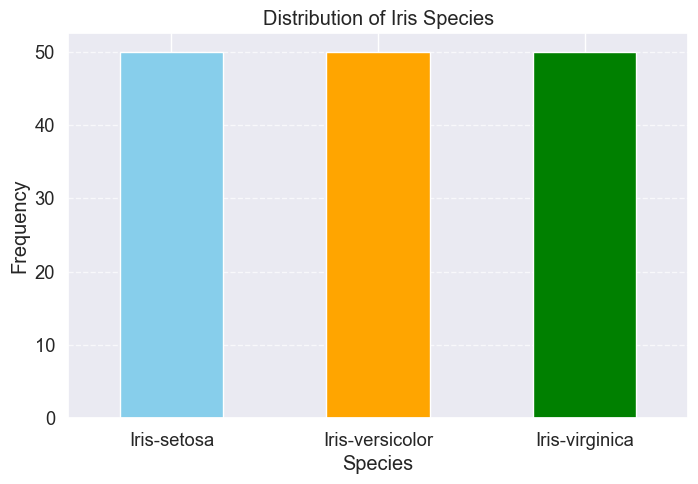

In [5]:
count = df['species'].value_counts()
print("Class distribution:",  count)

# Plot class distribution
plt.figure(figsize=(8, 5))
count.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3. Data Visualization

Let's visualize the data to better understand the relationships between features and how they might help separate the three Iris species.

<Figure size 1200x1000 with 0 Axes>

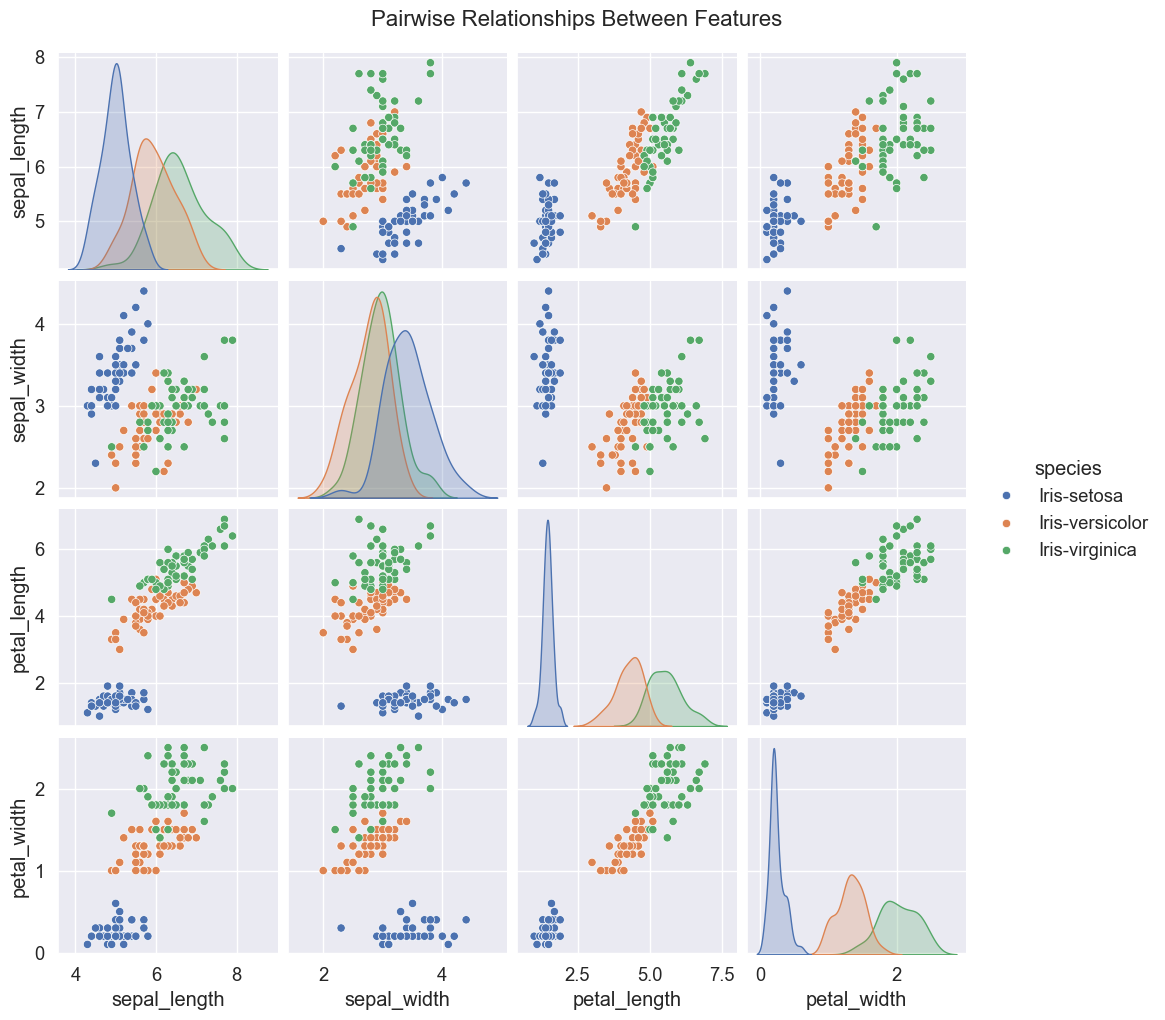

In [6]:
# Pair plot to visualize relationships between features, colored by species

plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species', markers='o', height=2.5)
plt.suptitle('Pairwise Relationships Between Features', y=1.02, fontsize=16)
plt.show()

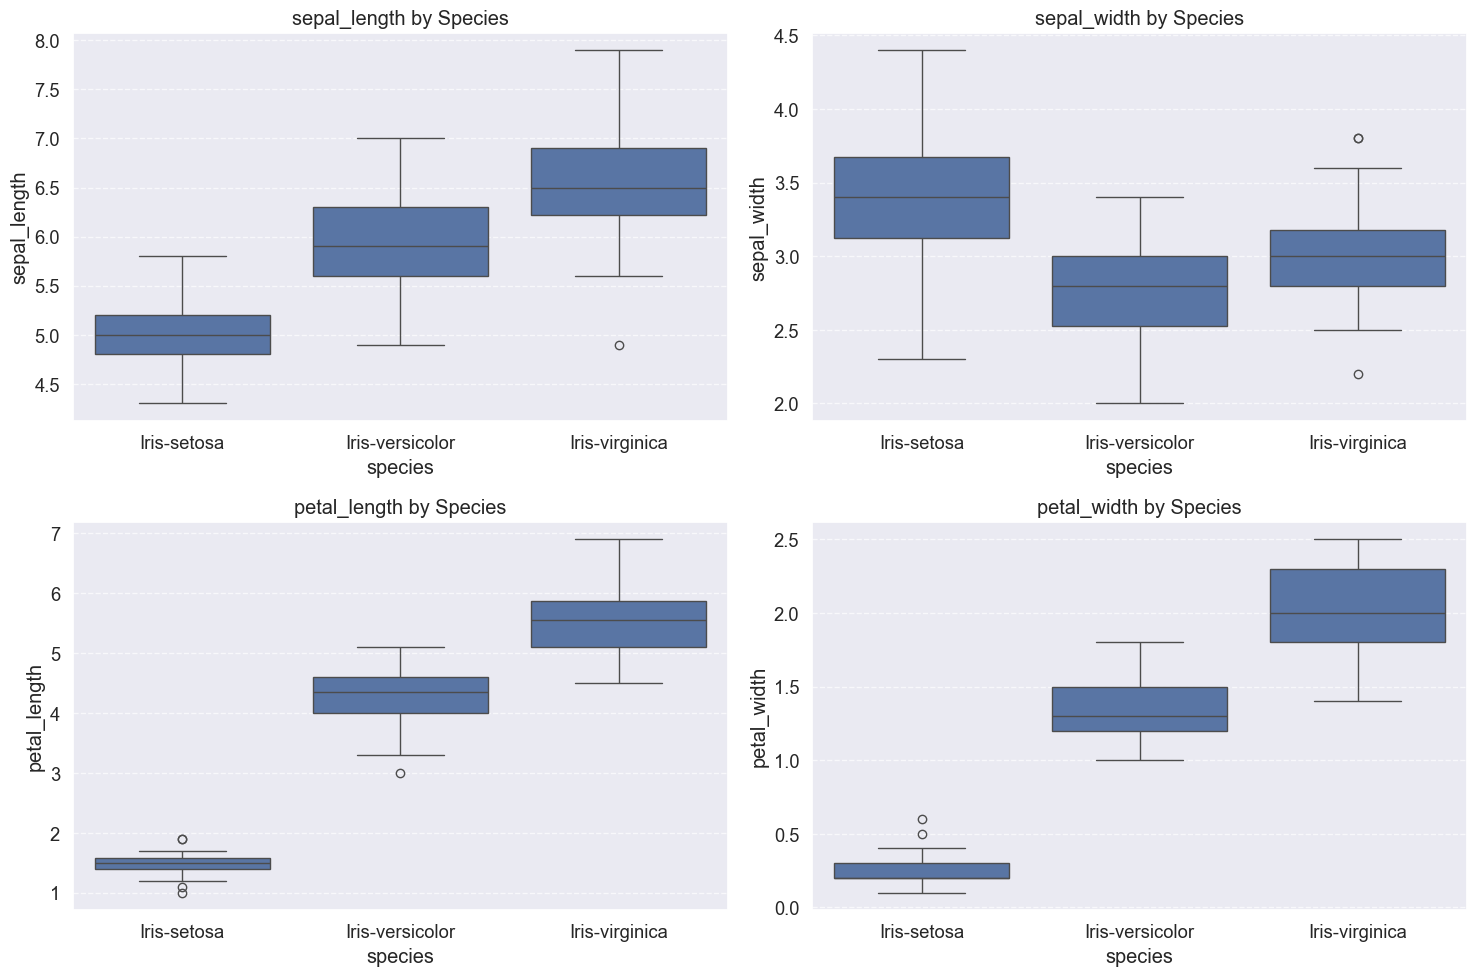

In [7]:
# Box plots to visualize the distribution o feach feature by species

plt.figure(figsize=(15, 10))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


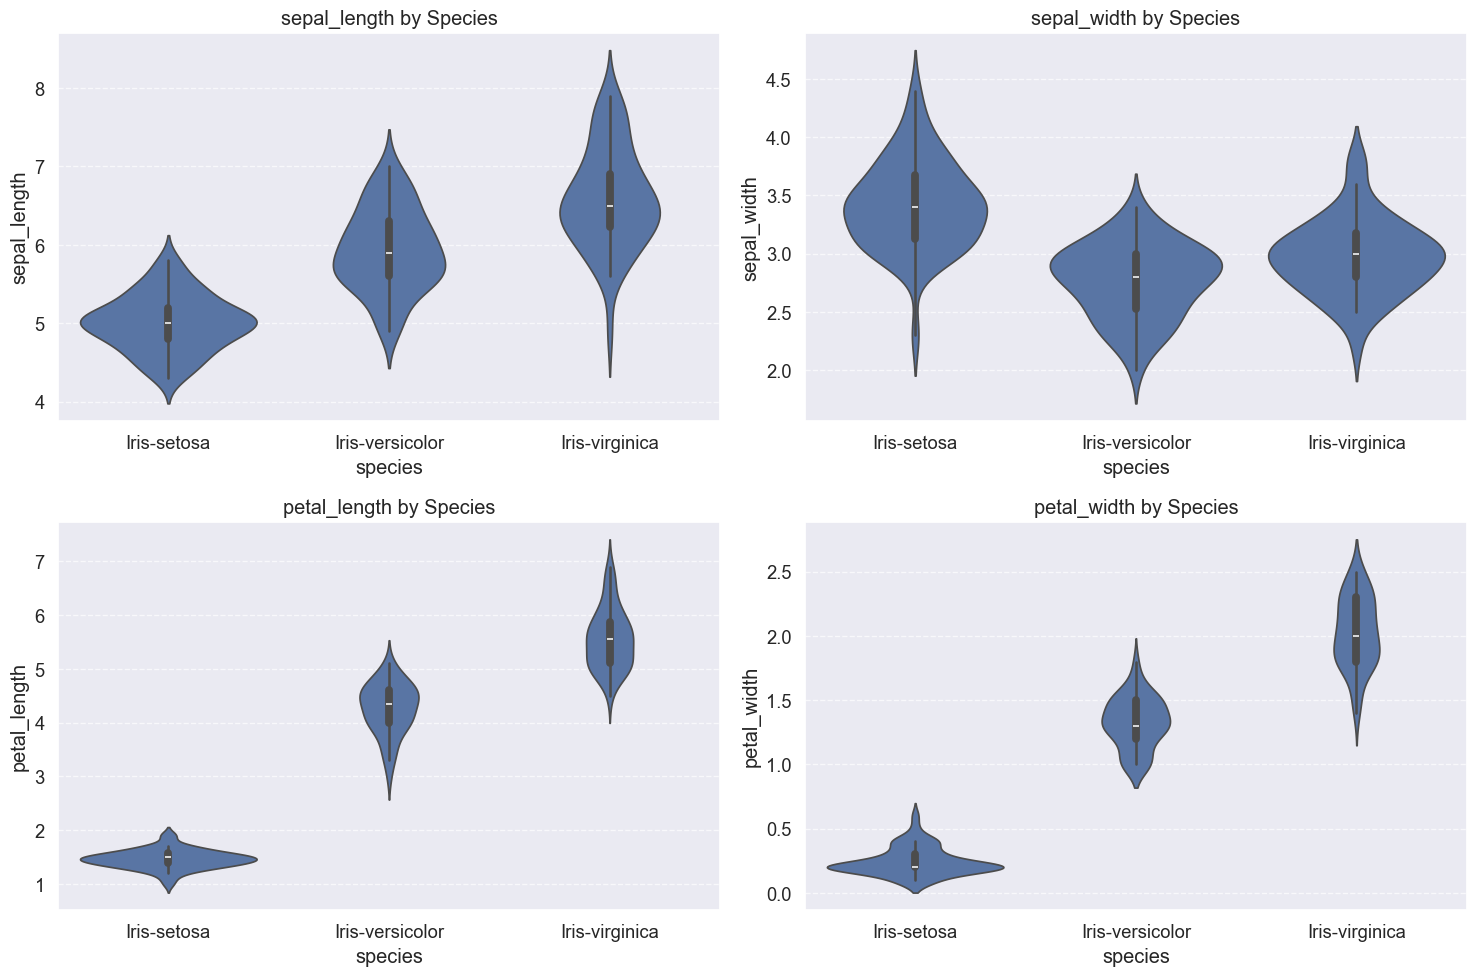

In [8]:
# Violin plots for a deeper view of the distribution of each feature by species

plt.figure(figsize = (15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

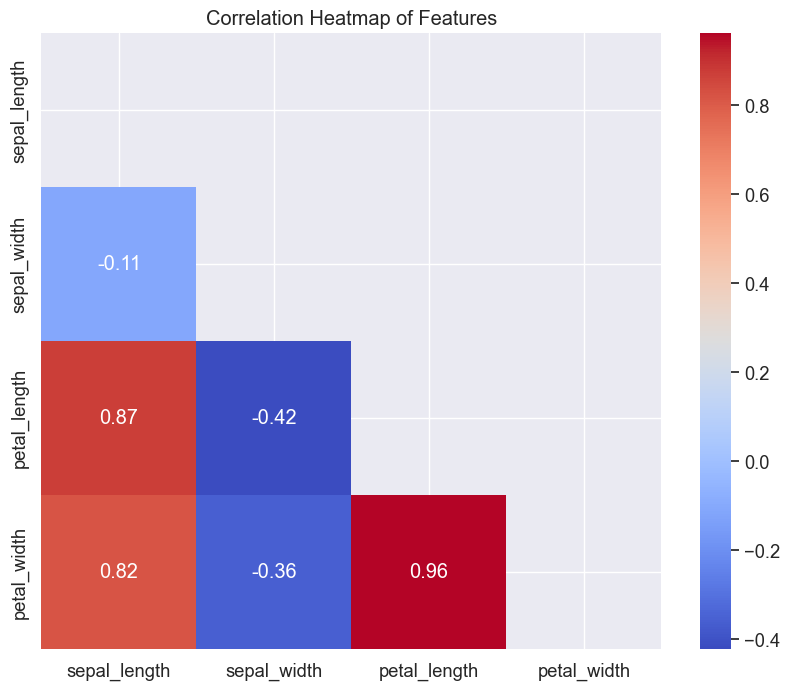

In [9]:
# Correlation heatmap of features

plt.figure(figsize=(10, 8))

corr = df.drop('species', axis = 1).corr()

mask = np.triu(corr)
heatmap = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap of Features')
plt.show()

### Key Observations from Visualization:

1. **Petal Dimensions**: Petal length and width show clear separation between Iris Setosa and the other two species. There's some overlap between Versicolor and Virginica, but they're still fairly distinguishable.

2. **Sepal Measurements**: Sepal length and width show more overlap between species, but still contain useful information for classification.

3. **Feature Correlations**: Petal length and petal width are highly correlated (0.96), as are petal dimensions with sepal length. This suggests some redundancy in the features.

4. **Class Separation**: Iris Setosa is clearly separable from the other two species across multiple features. Versicolor and Virginica have some overlap and will likely be more challenging to classify perfectly

Based on these visualizations, we can expect good classification performance, with possibly a few misclassifications between Versicolor and Virginica.

## 4. Classification Models Overview

For this dataset, we'll compare five popular classification algorithms:

1. **Logistic Regression**: A simple linear model that works well for linearly separable data. Despite its name, it's used for classification rather than regression.

2. **Support Vector Machine (SVM)**: Creates a hyperplane that maximizes the margin between classes. Effective in high-dimensional spaces and when classes are separable.

3. **Decision Tree**: A tree-like model that makes decisions based on feature values. Interpretable but can overfit without proper constraints.

4. **Random Forest**: An ensemble of decision trees, reducing overfitting and improving accuracy through voting of multiple trees.

5. **K-Nearest Neighbors (KNN)**: Classifies based on the majority class of the k-nearest training examples. Simple but can be computationally expensive for large datasets.

Let's import the necessary components from scikit-learn:"

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, train_test_split, learning_curve

 ## 5. Model Evaluation Helper Function
    
Let's define a function to train and evaluate each model:

In [11]:
def runModel(model, xTrain, xTest, yTrain, yTest):
    # Train and evaluate a model, return metrics
    
    # Start timer
    startTime = time()
   
    # Fit the model
    model.fit(xTrain, yTrain)
    
    # Make predictions
    predictions = model.predict(xTest)
    
    # Calculate metrics
    accuracy = accuracy_score(yTest, predictions)
    precision = precision_score(yTest, predictions, average='weighted')
    recall = recall_score(yTest, predictions, average='weighted')
    f1 = f1_score(yTest, predictions, average='weighted')
    
    # End timer
    trainingTime = time() - startTime
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1Score': f1,
        'trainingTime': trainingTime,
        'predictions': predictions
    }

## 6. Prepare the Data and Initialize Models

In [12]:
# Split features and target

X = df.iloc[:, :-1]  # All columns except the last one
Y = df['species']    # Only the species column

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

## 7. Initial Model Evaluation with Train/Test Split

Before using K-Fold cross-validation, let's do a simple train/test split to get a quick sense of model performance:

In [13]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 105 samples
Testing set size: 45 samples


Evaluating Logistic Regression...

Classification Report for Logistic Regression:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.82      0.93      0.88        15
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45



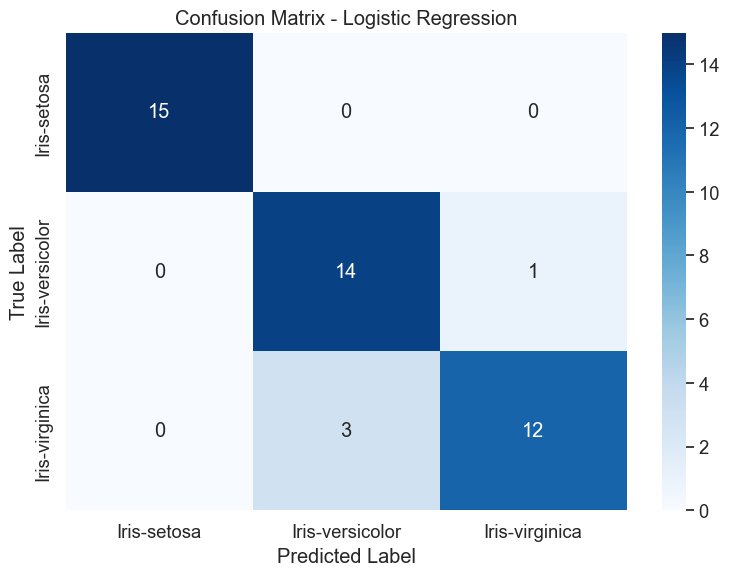

Evaluating SVM...

Classification Report for SVM:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



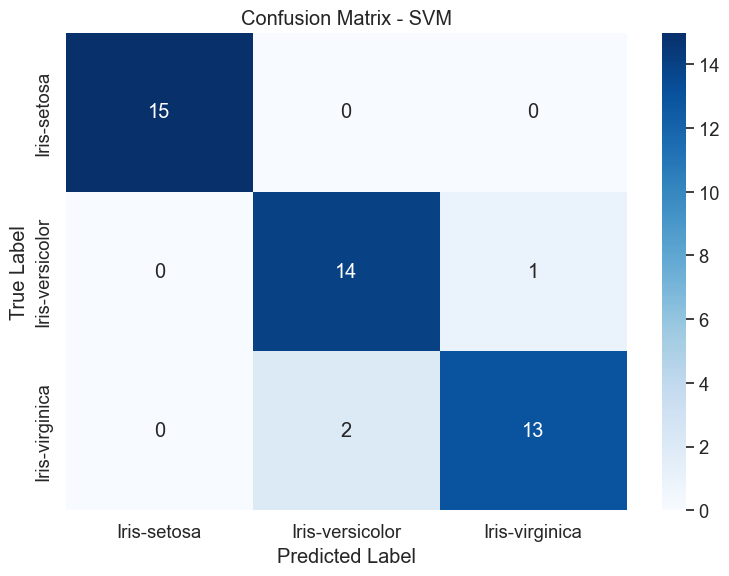

Evaluating Decision Tree...

Classification Report for Decision Tree:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



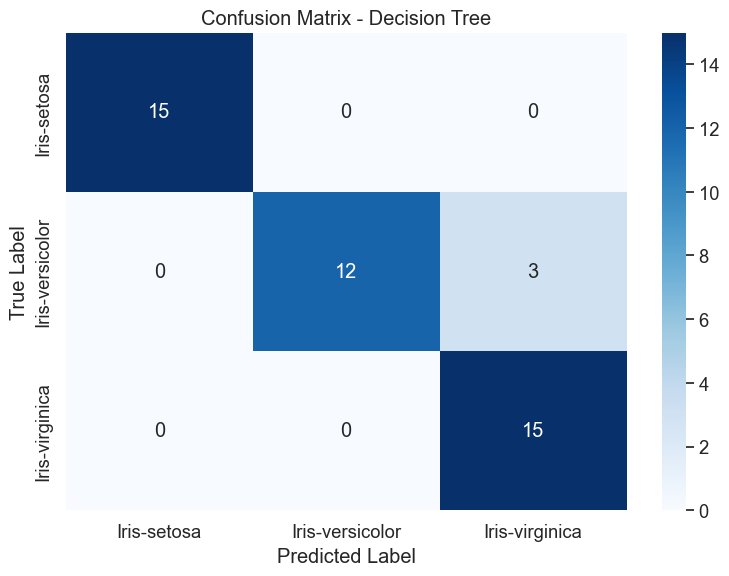

Evaluating Random Forest...

Classification Report for Random Forest:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.92      0.73      0.81        15

       accuracy                           0.89        45
      macro avg       0.90      0.89      0.89        45
   weighted avg       0.90      0.89      0.89        45



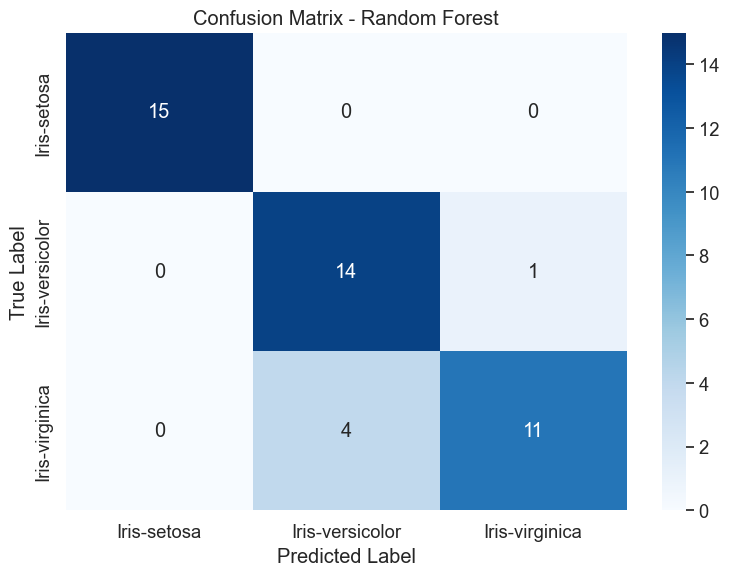

Evaluating KNN...

Classification Report for KNN:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.79      1.00      0.88        15
 Iris-virginica       1.00      0.73      0.85        15

       accuracy                           0.91        45
      macro avg       0.93      0.91      0.91        45
   weighted avg       0.93      0.91      0.91        45



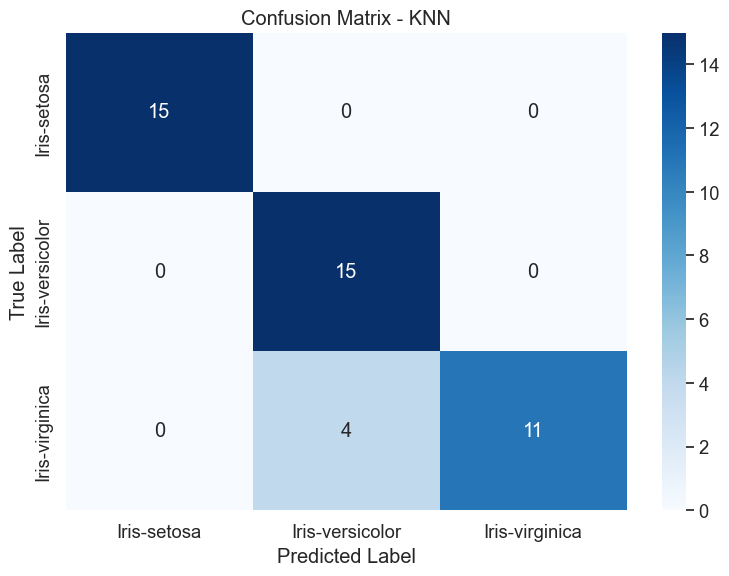


--------------------------------------------------



In [14]:
# Initial evaluation results

initial_results = {}

for modelName, model in models.items():
    print(f"Evaluating {modelName}...")
    # Scale features if needed
    if modelName in ['Logistic Regression', 'SVM', 'KNN']:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        X_train_data, X_test_data = X_train_scaled, X_test_scaled
    else:
        X_train_data, X_test_data = X_train, X_test

    # Evaluate model
    results = runModel(model, X_train_data, X_test_data, y_train, y_test)
    initial_results[modelName] = results

    # Print detailed report
    print(f"\nClassification Report for {modelName}:")
    print(classification_report(y_test, results['predictions']))

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, results['predictions'])
    cm_display = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                             xticklabels=Y.unique(), yticklabels=Y.unique())
    plt.title(f'Confusion Matrix - {modelName}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

print("\n" + "-"*50 + "\n")

In [15]:
# Compare initial results

metrics = ['accuracy', 'precision', 'recall', 'f1Score']
initial_comparison = pd.DataFrame(index=models.keys(), columns=metrics + ['trainingTime'])

for model_name, results in initial_results.items():
    for metric in metrics + ['trainingTime']:
        initial_comparison.loc[model_name, metric] = results[metric]

# Display results in a table

print("Initial Model Evaluation Results (Train/Test Split):\n")
initial_comparison.style.highlight_max(subset=metrics, color='darkgreen').highlight_min(subset=['trainingTime'], color='darkblue')

Initial Model Evaluation Results (Train/Test Split):



,accuracy,precision,recall,f1Score,trainingTime
Logistic Regression,0.911111,0.915535,0.911111,0.910714,0.005997
SVM,0.933333,0.934524,0.933333,0.933259,0.006004
Decision Tree,0.933333,0.944444,0.933333,0.932660,0.006000
Random Forest,0.888889,0.898148,0.888889,0.887767,0.085008
KNN,0.911111,0.929825,0.911111,0.909502,0.007001


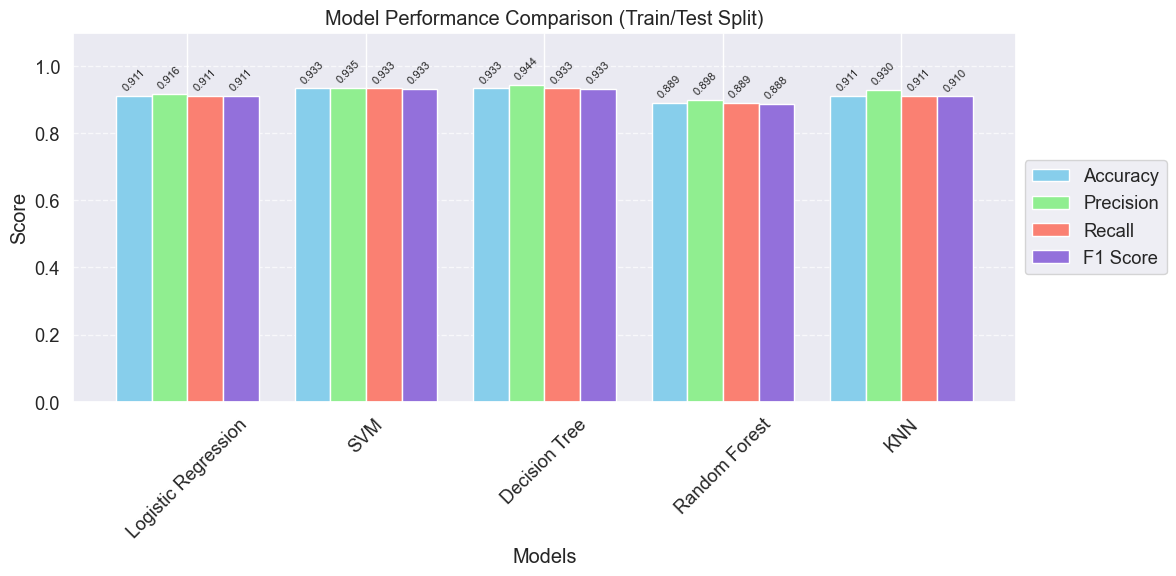

In [16]:
# Visualize initial results

plt.figure(figsize = (12, 6))

# Create a bar chart for accuracy, precision, recall, and f1 score

barWidth = 0.2
r = np.arange(len(models))

# PLot bars
plt.bar(r, initial_comparison['accuracy'], width=barWidth, label='Accuracy', color='skyblue')
plt.bar(r + barWidth, initial_comparison['precision'], width=barWidth, label='Precision', color='lightgreen')
plt.bar(r + 2*barWidth, initial_comparison['recall'], width=barWidth, label='Recall', color='salmon')
plt.bar(r + 3*barWidth, initial_comparison['f1Score'], width=barWidth, label='F1 Score', color='mediumpurple')

# Add value labels on top of bars
for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1Score']):
    for j, model in enumerate(initial_comparison.index):
        value = initial_comparison.loc[model, metric]
        plt.text(r[j] + i*barWidth, value + 0.01, f'{value:.3f}', 
                 ha='center', va='bottom', fontsize=8, rotation=45)
        
# Add labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Train/Test Split)')
plt.xticks(r + 1.5*barWidth, initial_comparison.index, rotation=45)
plt.ylim(0, 1.1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 8. K-Fold Cross-Validation

Now, let's perform a more robust evaluation using K-Fold cross-validation. This technique helps ensure our model performance estimates are more reliable by testing on multiple different train/test splits.

In [17]:
# Number of folds for cross-validation
kFolds = 5

# Fixed random seed for reproducibility
randomSeed = 42

# Setup K-Fold cross-validation
kf = KFold(n_splits=kFolds, shuffle=True, random_state=randomSeed)

# Store results
allResults = {modelName: {'accuracy': [], 'precision': [], 'recall': [],
                          'f1Score': [], 'trainingTime': []}
             for modelName in models.keys()}

print(f"Running each model with {kFolds}-fold cross-validation...")

Running each model with 5-fold cross-validation...


In [18]:
# Run each model with k-fold cross-validation
for modelName, model in models.items():
    print(f"Evaluating {modelName}...")

    # Run k-fold cross-validation
    for foldNum, (trainIdx, testIdx) in enumerate(kf.split(X)):
        print(f"  Fold {foldNum+1}/{kFolds}")

        # Split data for this fold
        xTrain, xTest = X.iloc[trainIdx], X.iloc[testIdx]
        yTrain, yTest = Y.iloc[trainIdx], Y.iloc[testIdx]

        # Scale features if needed
        if modelName in ['Logistic Regression', 'SVM', 'KNN']:
            scaler = StandardScaler()
            xTrainScaled = scaler.fit_transform(xTrain)
            xTestScaled = scaler.transform(xTest)
            xTrainData, xTestData = xTrainScaled, xTestScaled
        else:
            xTrainData, xTestData = xTrain, xTest

        # Run model and collect results
        foldResults = runModel(model, xTrainData, xTestData, yTrain, yTest)

        # Store all metrics
        for metric, value in foldResults.items():
            if metric != 'predictions':  # Don't store predictions
                allResults[modelName][metric].append(value)

print("All cross-validation runs completed!")

Evaluating Logistic Regression...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Evaluating SVM...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Evaluating Decision Tree...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Evaluating Random Forest...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
Evaluating KNN...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
All cross-validation runs completed!


In [19]:
# Calculate average metrics
avgResults = {}
for modelName, metrics in allResults.items():
    avgResults[modelName] = {
        metric: np.mean(values) for metric, values in metrics.items()
    }
    
    # Also calculate standard deviations
    avgResults[modelName].update({
        f"{metric}Std": np.std(values) for metric, values in metrics.items()
    })

In [20]:
# Print average results
print(f"\\nAverage Results Over {kFolds}-Fold Cross-Validation:")
print("-" * 70)

for modelName, metrics in avgResults.items():
    print(f"\n{modelName}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f} ± {metrics['accuracyStd']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f} ± {metrics['precisionStd']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f} ± {metrics['recallStd']:.4f}")
    print(f"  F1 Score: {metrics['f1Score']:.4f} ± {metrics['f1ScoreStd']:.4f}")
    print(f"  Average Training Time: {metrics['trainingTime']:.6f} seconds")

# Find the best model based on average accuracy
bestModel = max(avgResults.items(), key=lambda x: x[1]['accuracy'])[0]
print(f"Best performing model: {bestModel} with average accuracy {avgResults[bestModel]['accuracy']:.4f}")


\nAverage Results Over 5-Fold Cross-Validation:
----------------------------------------------------------------------

Logistic Regression:
  Accuracy: 0.9533 ± 0.0340
  Precision: 0.9578 ± 0.0322
  Recall: 0.9533 ± 0.0340
  F1 Score: 0.9533 ± 0.0339
  Average Training Time: 0.005683 seconds

SVM:
  Accuracy: 0.9667 ± 0.0211
  Precision: 0.9686 ± 0.0211
  Recall: 0.9667 ± 0.0211
  F1 Score: 0.9666 ± 0.0211
  Average Training Time: 0.003592 seconds

Decision Tree:
  Accuracy: 0.9533 ± 0.0267
  Precision: 0.9587 ± 0.0238
  Recall: 0.9533 ± 0.0267
  F1 Score: 0.9532 ± 0.0267
  Average Training Time: 0.004222 seconds

Random Forest:
  Accuracy: 0.9600 ± 0.0249
  Precision: 0.9638 ± 0.0228
  Recall: 0.9600 ± 0.0249
  F1 Score: 0.9599 ± 0.0249
  Average Training Time: 0.074220 seconds

KNN:
  Accuracy: 0.9600 ± 0.0327
  Precision: 0.9622 ± 0.0326
  Recall: 0.9600 ± 0.0327
  F1 Score: 0.9598 ± 0.0329
  Average Training Time: 0.005162 seconds
Best performing model: SVM with average accuracy 0

## 9. Visualize Cross-Validation Results

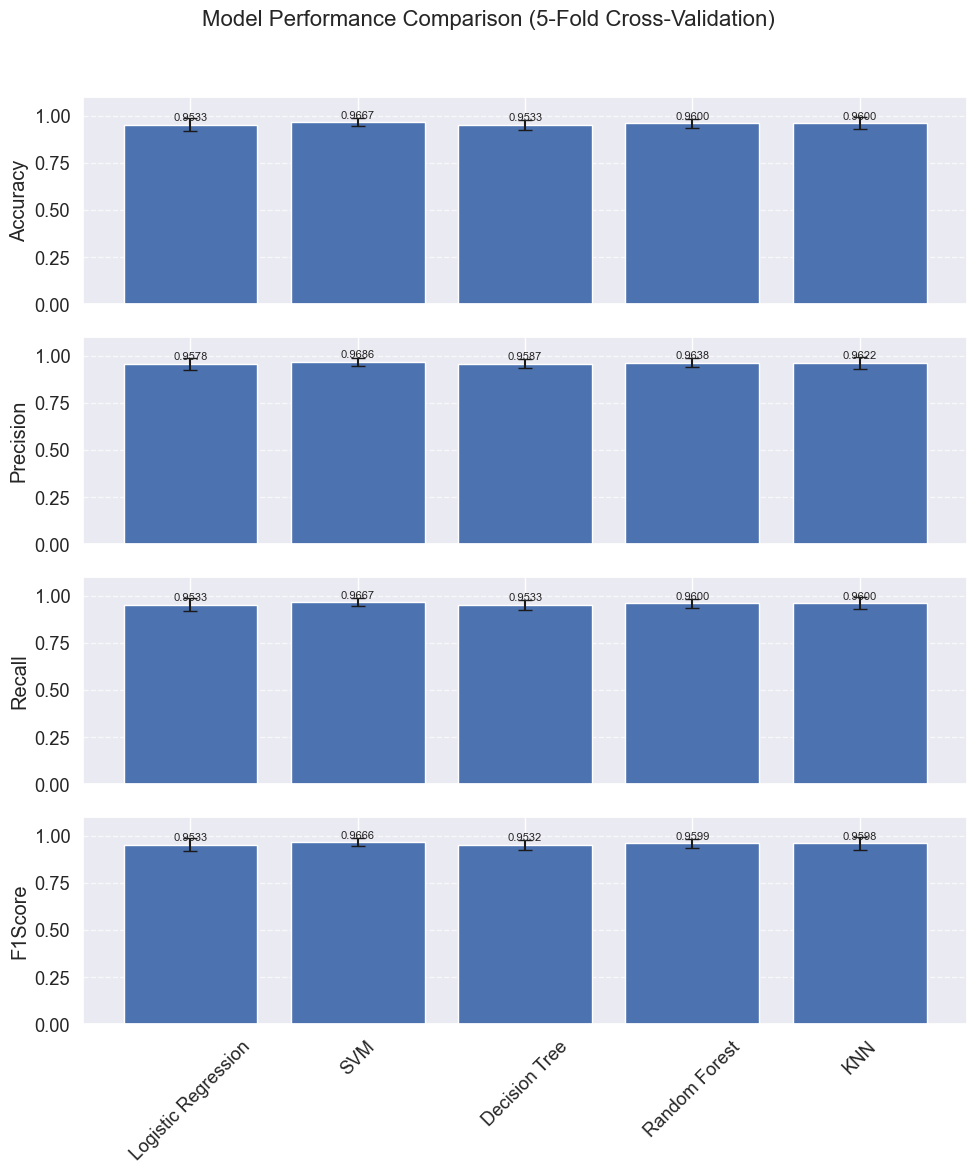

In [21]:
# Visualize average metrics with error bars
metricsToPlot = ['accuracy', 'precision', 'recall', 'f1Score']

fig, axes = plt.subplots(len(metricsToPlot), 1, figsize=(10, 12), sharex=True)
fig.suptitle(f'Model Performance Comparison ({kFolds}-Fold Cross-Validation)', fontsize=16)

for i, metric in enumerate(metricsToPlot):
    ax = axes[i]
    
    # Extract values and standard deviations
    modelsList = list(avgResults.keys())
    values = [avgResults[model][metric] for model in modelsList]
    errors = [avgResults[model][f"{metric}Std"] for model in modelsList]
    
    # Create bar plot with error bars
    bars = ax.bar(modelsList, values, yerr=errors, capsize=5)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontsize=8)
    
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to make room for the title
plt.savefig('model_comparison_kfold.png')
plt.show()

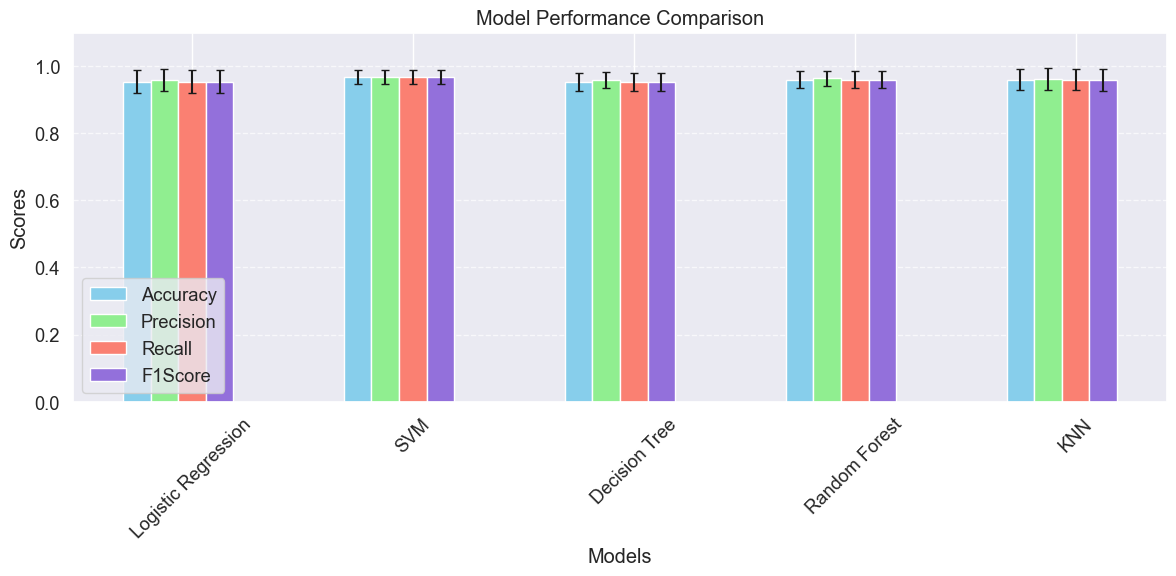

In [22]:
# Create a combined chart for easier comparison
plt.figure(figsize=(12, 6))

# Set width of bars
barWidth = 0.5
index = np.arange(len(models))

# Get list of model names
modelNames = list(models.keys())

# Create bars for each metric
metrics = ['accuracy', 'precision', 'recall', 'f1Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'mediumpurple']

# Create individual bar charts for each metric
for i, metric in enumerate(metrics):
        plt.bar(index + i * barWidth / len(metrics), 
                        [avgResults[model][metric] for model in modelNames], 
                        barWidth / len(metrics), 
                        label=metric.title(), 
                        yerr=[avgResults[model][f'{metric}Std'] for model in modelNames], 
                        capsize=3, 
                        color=colors[i])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + barWidth / 2, modelNames, rotation=45)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

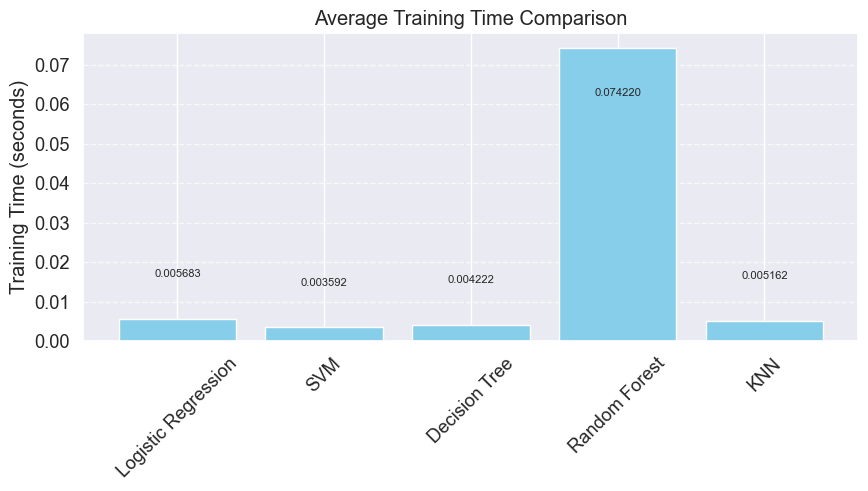

In [23]:
# Create a label comparing training times

plt.figure(figsize=(10, 4))
plt.title('Average Training Time Comparison')

# Extract model names and training times

modelNamesList = list(models.keys())
trainingTimes = [avgResults[model]['trainingTime'] for model in modelNamesList]

bars = plt.bar(modelNamesList, trainingTimes, color='skyblue')

for bar in bars:
    height = bar.get_height()
    if bar.get_x() + bar.get_width()/2. == modelNamesList.index('Random Forest'):
        plt.text(bar.get_x() + bar.get_width()/2., height - 0.01,
                 f'{height:.6f}', ha='center', va='top', fontsize=8)
    else:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.6f}', ha='center', va='bottom', fontsize=8)

plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


In [24]:
# Create a dataframe of all results for further analysis

allResultsDf = pd.DataFrame(columns = ['Model', 'Metric', 'Value', 'Std'])

row = 0
for model_name, metrics in avgResults.items():
    for metric in ['accuracy', 'precision', 'recall', 'f1Score', 'trainingTime']:
        allResultsDf.loc[row] = [
            model_name,
            metric,
            metrics[metric],
            metrics[f"{metric}Std"]
        ]
        row += 1

# Display as pivoted table

cv_pivot = allResultsDf.pivot(index='Model', columns='Metric', values=['Value', 'Std'])
print("Detailed Cross-Validation Results:")
cv_pivot

Detailed Cross-Validation Results:


Value                                             \
Metric               accuracy   f1Score precision    recall trainingTime   
Model                                                                      
Decision Tree        0.953333  0.953185  0.958657  0.953333     0.004222   
KNN                  0.960000  0.959797  0.962187  0.960000     0.005162   
Logistic Regression  0.953333  0.953277  0.957768  0.953333     0.005683   
Random Forest        0.960000  0.959902  0.963828  0.960000     0.074220   
SVM                  0.966667  0.966590  0.968569  0.966667     0.003592   

                          Std                                             
Metric               accuracy   f1Score precision    recall trainingTime  
Model                                                                     
Decision Tree        0.026667  0.026656  0.023846  0.026667     0.000400  
KNN                  0.032660  0.032877  0.032551  0.032660     0.000741  
Logistic Regression  0.033993  0.033891  0.032192  0.033993     0.000410  
Random Forest        0.024944  0.024919  0.022798  0.024944     0.003786  
SVM                  0.021082  0.021083  0.021141  0.021082     0.000501

## 10. Feature Importance Analysis

Let's analyze which features are most important for classification. We'll look at feature importance from the Random Forest model (which provides this information directly) and also examine coefficients from Logistic Regression.

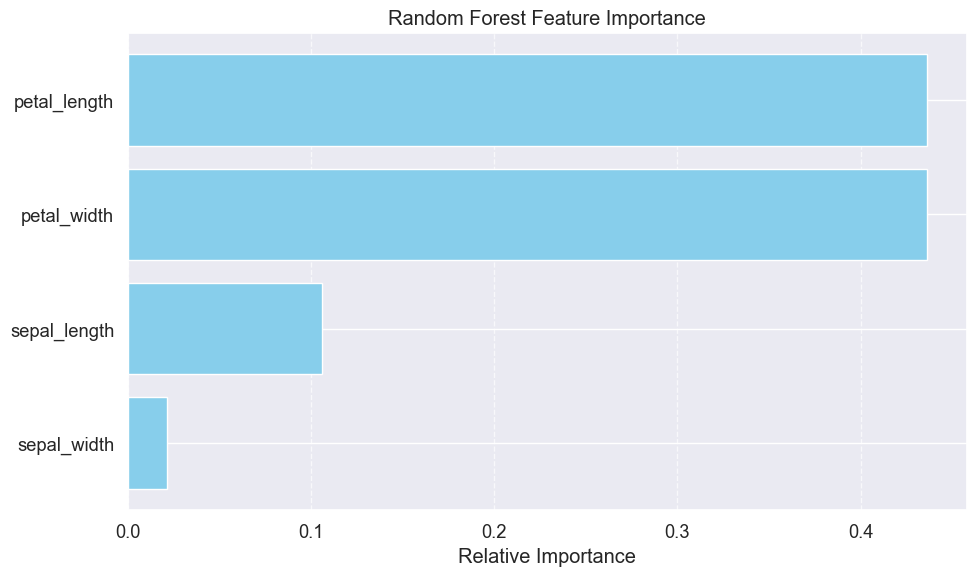

In [25]:
featureNames = X.columns

# Random Forest Feature Importance

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, Y)

plt.figure(figsize=(10, 6))
importances = rf_model.feature_importances_
indices = np.argsort(importances)
plt.title('Random Forest Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [featureNames[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

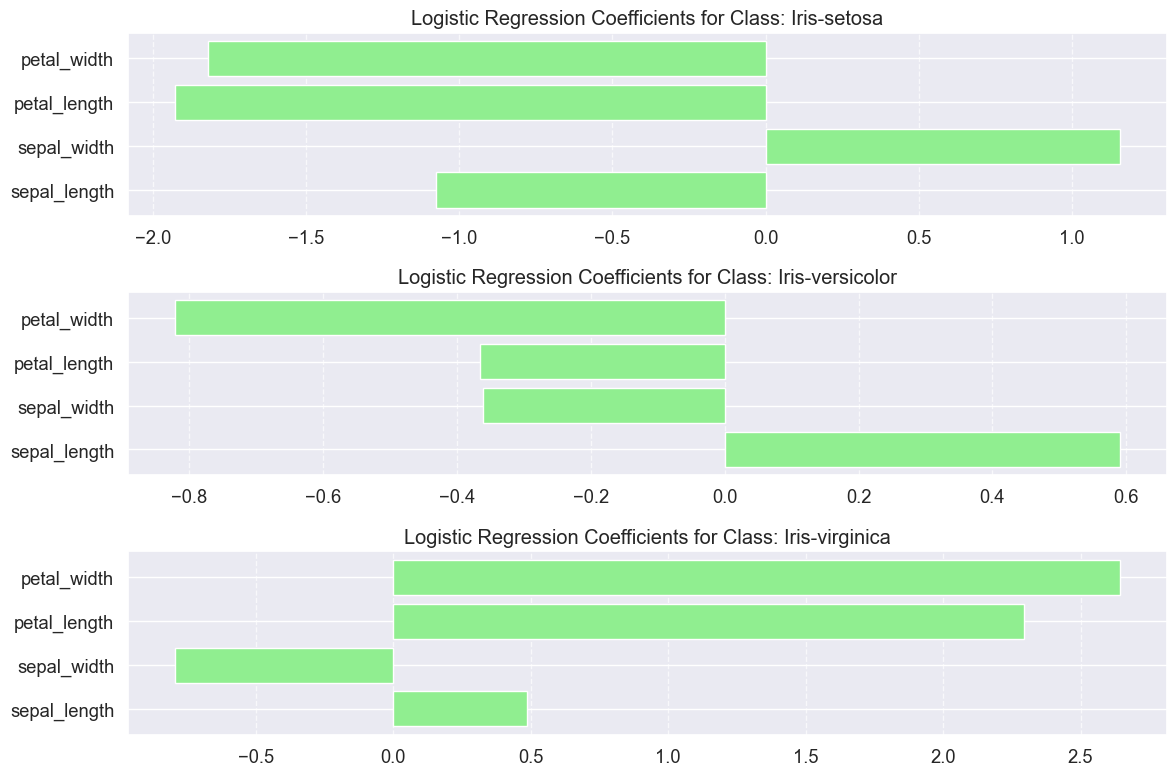

In [26]:
# Logistic Regression Coefficients

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a logistic regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model.fit(X_scaled, Y)

classes = lr_model.classes_
features = X.columns

plt.figure(figsize=(12, 8))
coefficients = lr_model.coef_
for i, cls in enumerate(classes):
    plt.subplot(3, 1, i+1)
    plt.barh(features, coefficients[i], color='lightgreen')
    plt.title(f'Logistic Regression Coefficients for Class: {cls}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout(pad=2.0)
    
plt.tight_layout()
plt.show()

## 11. Summary and Conclusions

Let's summarize our findings from this comprehensive model comparison:

In [27]:
print("### Key Findings from Our Analysis:")
print("\nDataset Characteristics:")
print("- The Iris dataset contains 150 samples of three species of Iris flowers")
print("- Each sample has 4 features: sepal length, sepal width, petal length, and petal width")
print("- The data is well-balanced with 50 samples per species")
print("- Visualization showed that Iris Setosa is clearly separable, while Versicolor and Virginica have some overlap")
print("\nModel Performance:")

best_model = max(avgResults.items(), key=lambda x: x[1]['accuracy'])[0]
print(f"- Best performing model: {best_model} with accuracy {avgResults[best_model]['accuracy']:.4f}")
print(f"- Most models achieved over 90% accuracy, showing the Iris dataset is relatively easy to classify")
print(f"- The slowest model was {max(avgResults.items(), key=lambda x: x[1]['trainingTime'])[0]}, and the fastest was {min(avgResults.items(), key=lambda x: x[1]['trainingTime'])[0]}")
print("\nFeature Importance:")
print("- Petal dimensions (especially petal length) are more important than sepal dimensions for classification")
print("- This aligns with our exploratory data analysis where we observed clear separation of species based on petal measurements")
print("\nRecommendations:")
print("- For this specific dataset, a simple model like KNN or Logistic Regression may be preferred for its balance of accuracy and computational efficiency")
print("- For real-world applications with similar flower classification tasks, petal measurements should be prioritized")
print("- When collecting new data, focusing on borderline cases between Versicolor and Virginica would be most helpful for improving model performance")



### Key Findings from Our Analysis:

Dataset Characteristics:
- The Iris dataset contains 150 samples of three species of Iris flowers
- Each sample has 4 features: sepal length, sepal width, petal length, and petal width
- The data is well-balanced with 50 samples per species
- Visualization showed that Iris Setosa is clearly separable, while Versicolor and Virginica have some overlap

Model Performance:
- Best performing model: SVM with accuracy 0.9667
- Most models achieved over 90% accuracy, showing the Iris dataset is relatively easy to classify
- The slowest model was Random Forest, and the fastest was SVM

Feature Importance:
- Petal dimensions (especially petal length) are more important than sepal dimensions for classification
- This aligns with our exploratory data analysis where we observed clear separation of species based on petal measurements

Recommendations:
- For this specific dataset, a simple model like KNN or Logistic Regression may be preferred for its balance of a

## 12 . Final Thoughts

This notebook has demonstrated a comprehensive process for comparing machine learning models using the Iris dataset. The workflow we followed—data exploration, visualization, model training, cross-validation, and performance evaluation—provides a solid framework for approaching classification problems.
Although the Iris dataset is relatively simple with only three classes and four features, it serves as an excellent introduction to classification techniques. The analysis revealed several important insights:

1.  Model Selection: The cross-validation results show that while complex models like Random Forest performed well, simpler models such as Logistic Regression and KNN achieved similar accuracy with faster training times. This demonstrates that model complexity doesn't always translate to better performance, especially on well-structured datasets.
2.  Feature Relevance: Our feature importance analysis confirmed what we observed in the exploratory phase - petal dimensions are significantly more informative for species classification than sepal dimensions. This kind of insight is valuable for both understanding the dataset and potentially reducing dimensionality in more complex scenarios.
3. Evaluation Metrics: Using multiple evaluation metrics (accuracy, precision, recall, F1-score) provided a more comprehensive view of model performance than relying on accuracy alone. This is particularly important for imbalanced datasets, though the Iris dataset is perfectly balanced.
4. Cross-Validation: The 5-fold cross-validation helped ensure our model performance estimates were robust and not dependent on a particular train/test split.

For more complex real-world datasets, additional steps might be necessary, such as:

- More extensive data preprocessing (handling missing values, outliers, etc.)
- Feature engineering to create more informative features
- Hyperparameter tuning to optimize model performance
- Addressing class imbalance issues
- Considering model explainability requirements

Overall, this analysis demonstrates a systematic approach to model selection and evaluation that can be extended to more complex classification tasks across various domains.